In [1]:
# Load all libraries

import xarray as xr
import pathlib
from os import listdir
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from matplotlib import gridspec
import matplotlib
import xesmf as xe
import cartopy

# Load data

In [2]:
F_std = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/paper1/fig_4_Fstd.nc')
F_std.load()

lambda_tot = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/paper1/fig_4_lambda.nc')
lambda_tot.load()

lambda_s = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/paper1/fig_4_lambda_s.nc')
lambda_s.load()

lambda_t = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/paper1/fig_4_lambda_t.nc')
lambda_t.load()

lambda_o = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/paper1/fig_4_lambda_o.nc')
lambda_o.load()

lambda_h = xr.open_dataarray('/data/keeling/a/mailes2/cesmle_variability_analysis/processed_data/paper1/fig_4_lambda_h.nc')
lambda_h.load()

<xarray.DataArray (name: 19, lat: 88, lon: 179)>
array([[[-1.85806274, -1.82975154, -1.8196615 , ..., -2.03537523,
         -1.9876789 , -1.96267372],
        [-1.77928275, -1.75468845, -1.7409601 , ..., -1.85283431,
         -1.8423518 , -1.81561159],
        [-1.83703372, -1.81452587, -1.80563058, ..., -1.90245421,
         -1.8995887 , -1.86306095],
        ...,
        [-1.23653582, -1.1515948 , -1.02759558, ..., -0.80264618,
         -1.023067  , -1.15004774],
        [-1.7830068 , -1.79994838, -1.82251424, ..., -1.38219272,
         -1.50666429, -1.62743918],
        [-1.91435234, -1.94257737, -1.95282602, ..., -1.8655998 ,
         -1.8586204 , -1.89144585]],

       [[-0.21436711, -0.1836519 , -0.13692132, ..., -0.32649777,
         -0.28761296, -0.26322177],
        [ 0.05453299,  0.10661103,  0.14293443, ..., -0.19483607,
         -0.13254361, -0.067746  ],
        [ 0.31646805,  0.38509933,  0.44549295, ..., -0.02880061,
          0.04973269,  0.13298737],
...
        [-0.7907136 , -0.69471539, -0.54775777, ..., -0.65986271,
         -0.79185472, -0.84274683],
        [-1.10652863, -1.10207602, -1.10075783, ..., -1.03355503,
         -1.05604767, -1.07792556],
        [-1.16338248, -1.15543646, -1.17871491, ..., -1.12388387,
         -1.15716158, -1.1882315 ]],

       [[ 1.2511436 ,  1.21165129,  1.2263671 , ...,  1.25962618,
          1.2556205 ,  1.23032388],
        [ 1.11033002,  1.15905622,  1.36057481, ...,  1.20086645,
          1.18477985,  1.14101384],
        [ 1.46861205,  1.51715198,  1.63054827, ...,  1.66801744,
          1.56248984,  1.41402386],
        ...,
        [-0.34928011, -0.20357517, -0.13076054, ..., -1.08208955,
         -0.90126356, -0.7168558 ],
        [-0.55742605, -0.49326719, -0.48114861, ..., -0.80433336,
         -0.78643583, -0.73842078],
        [-0.36757477, -0.37580199, -0.37850181, ..., -0.45781248,
         -0.43760784, -0.39777275]]])
Coordinates:
  * lat      (lat) int64 -87 -85 -83 -81 -79 -77 -75 ... 75 77 79 81 83 85 87
  * lon      (lon) int64 1 3 5 7 9 11 13 15 ... 343 345 347 349 351 353 355 357
  * name     (name) object 'ACCESS-CM2' 'BCC-CSM2-MR' ... 'MRI-ESM2-0' 'NorCPM1'

In [8]:
vert_ds = xr.open_dataarray('/data/keeling/a/mailes2/a/finalized_var_data/CMIP_wap_37model_piControl_2x2_last250.nc')
vert_ds.load()

vert_ds = vert_ds.sel(name=['ACCESS-CM2', 'BCC-CSM2-MR', 'BCC-ESM1', 'CAMS-CSM1-0', 'CanESM5',
       'CESM2', 'CESM2-WACCM', 'CESM2-WACCM-FV2', 'CMCC-CM2-SR5', 'FGOALS-g3',
       'GFDL-CM4', 'GFDL-ESM4', 'GISS-E2-1-G', 'MIROC6',
       'MPI-ESM1-2-HR', 'MPI-ESM1-2-LR', 'MRI-ESM2-0', 'NorCPM1'])

vert_ds = vert_ds.mean('time')

# Plot

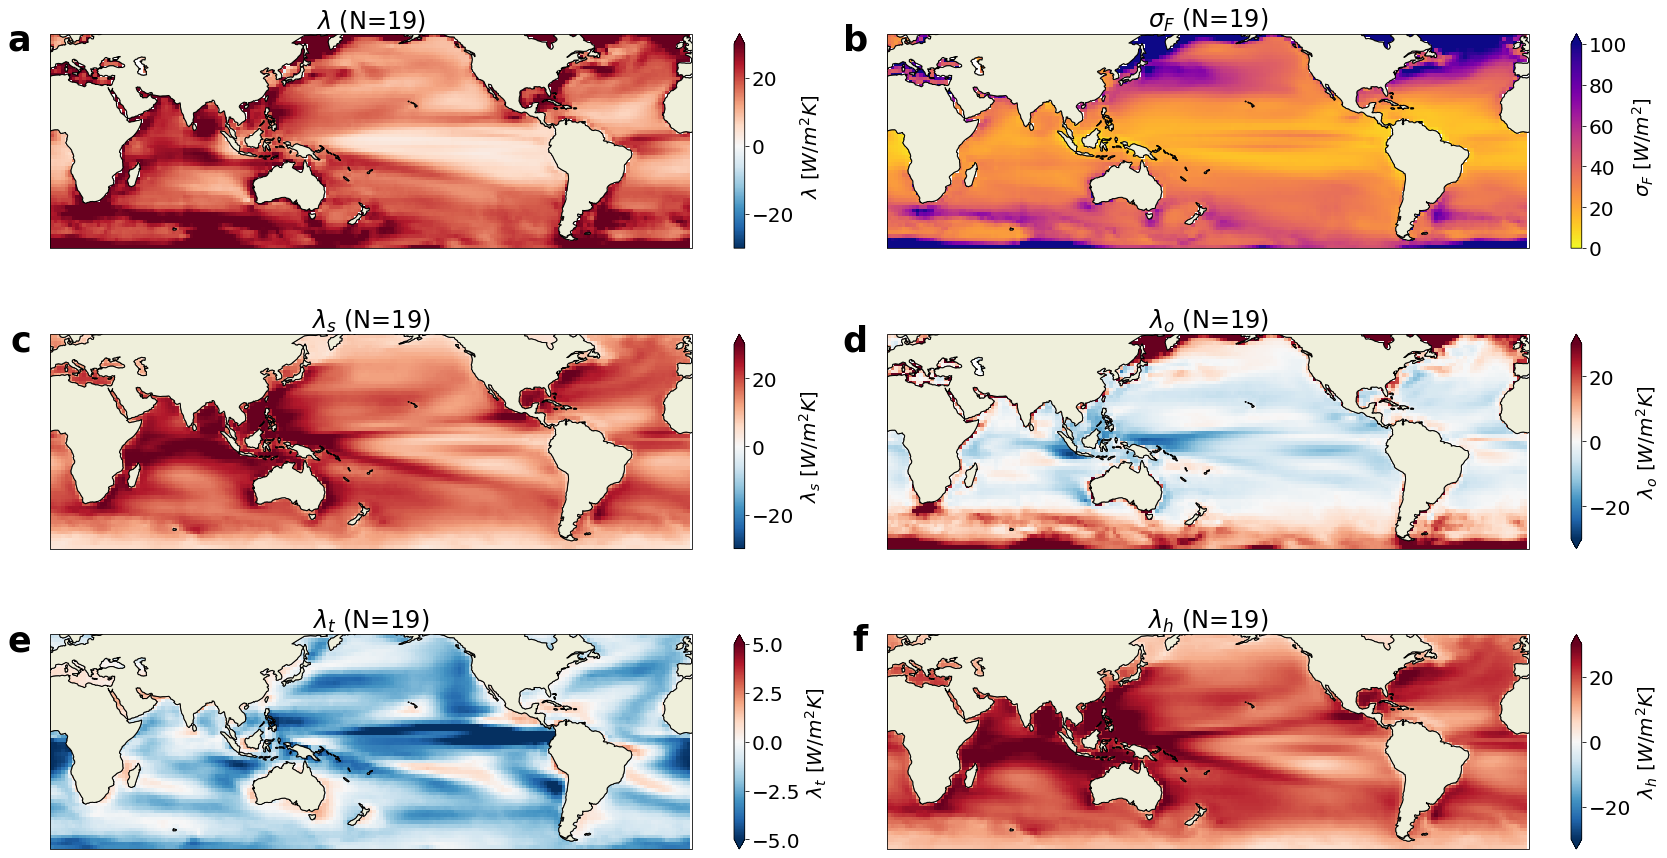

In [9]:
fig = plt.figure(figsize=(30, 15))
gs = gridspec.GridSpec(nrows=3, ncols=2)
gs.update(wspace=0)
#top=300
#bottom=270
font = {'size'   : 20,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

vmin = -30
vmax = 30

ax1 = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=180))
lambda_tot.mean('name').plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax,
                           cmap='RdBu_r', cbar_kwargs = {#"shrink": 0.7,
                                                         "label": r'$\lambda$ [$W/m^2K$]'}
                                          )
ax1.coastlines(color='black', linewidth=1)
#vert_ds.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
#cb1.set_label(label=r'$\lambda$ [$W/m^2K$]')
ax1.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax1.text(-0.03, 1.05, 'a', transform=ax1.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
ax1.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
plt.title(r'$\lambda$ (N=19)')

ax2 = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=180))
F_std.mean('name').plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=0, vmax=100, cmap='plasma_r',
                                 cbar_kwargs = {#'shrink': 0.7,
                                                #'ticks': [10e1],
                                                "label": r'$\sigma_F$ [$W/m^2$]'}
                                )
#cb = plt.colorbar(f_plot, orientation="horizontal", pad=0.05, aspect=25, shrink=0.9, extend='both', 
#                  ticks=[10**1, 2*10**1, 4*10**1, 6*10**1, 8*10**1,10**2])
#cb.ax.minorticks_off()
#cb.ax.set_xticklabels([1e1, 2e1, 4e1, 6e1, 8e1,10e1])
#cb.set_ticklabels([r'$10^1$', r'$2x10^1$', r'$4x10^1$', r'$6x10^1$', r'$8x10^1$', r'$10^2$'])
ax2.coastlines(color='black', linewidth=1)
#cb.set_label(label=r'$\sigma_F$ [$W/m^2$]')
#vert_ds.plot.contour(ax=ax2, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
ax2.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax2.text(-0.03, 1.05, 'b', transform=ax2.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
ax2.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
plt.title(r'$\sigma_F$ (N=19)')

ax3 = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=180))
lambda_s.mean('name').plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, 
                           cmap='RdBu_r', cbar_kwargs = {#"shrink": 0.7,
                                                         "label": r'$\lambda_s$ [$W/m^2K$]'})
ax3.coastlines(color='black', linewidth=1)
#ax1.gridlines(draw_labels=True)
#vert_ds.plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
ax3.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax3.text(-0.03, 1.05, 'c', transform=ax3.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
plt.title(r'$\lambda_s$ (N=19)')
ax3.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')

ax4 = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=180))
lambda_o.mean('name').plot(ax=ax4, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax,
                               cmap='RdBu_r', cbar_kwargs = {#"shrink": 0.7,
                                                             "label": r'$\lambda_o$ [$W/m^2K$]'})
ax4.coastlines(color='black', linewidth=1)
#vert_ds.plot.contour(ax=ax2, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
ax4.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax4.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax4.text(-0.03, 1.05, 'd', transform=ax4.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
plt.title(r'$\lambda_o$ (N=19)')

ax6 = fig.add_subplot(gs[2,1], projection=ccrs.PlateCarree(central_longitude=180))
lambda_h.mean('name').plot(ax=ax6, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax,
                           cmap='RdBu_r', cbar_kwargs = {#"shrink": 0.7,
                                                         "label": r'$\lambda_h$ [$W/m^2K$]'})
ax6.coastlines(color='black', linewidth=1)
ax6.text(-0.03, 1.05, 'f', transform=ax6.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
ax6.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
#vert_ds.plot.contour(ax=ax4, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
plt.title(r'$\lambda_h$ (N=19)')
ax6.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')

ax5 = fig.add_subplot(gs[2,0], projection=ccrs.PlateCarree(central_longitude=180))
lambda_t.mean('name').plot(ax=ax5, transform=ccrs.PlateCarree(), vmin=-5, vmax=5,
                           cmap='RdBu_r', cbar_kwargs = {#"shrink": 0.7,
                                                         "label": r'$\lambda_t$ [$W/m^2K$]'})
ax5.coastlines(color='black', linewidth=1)
ax5.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax5.text(-0.03, 1.05, 'e', transform=ax5.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
#vert_ds.plot.contour(ax=ax3, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
plt.title(r'$\lambda_t$ (N=19)')
ax5.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')

plt.subplots_adjust(wspace=0.3, hspace=0.4)

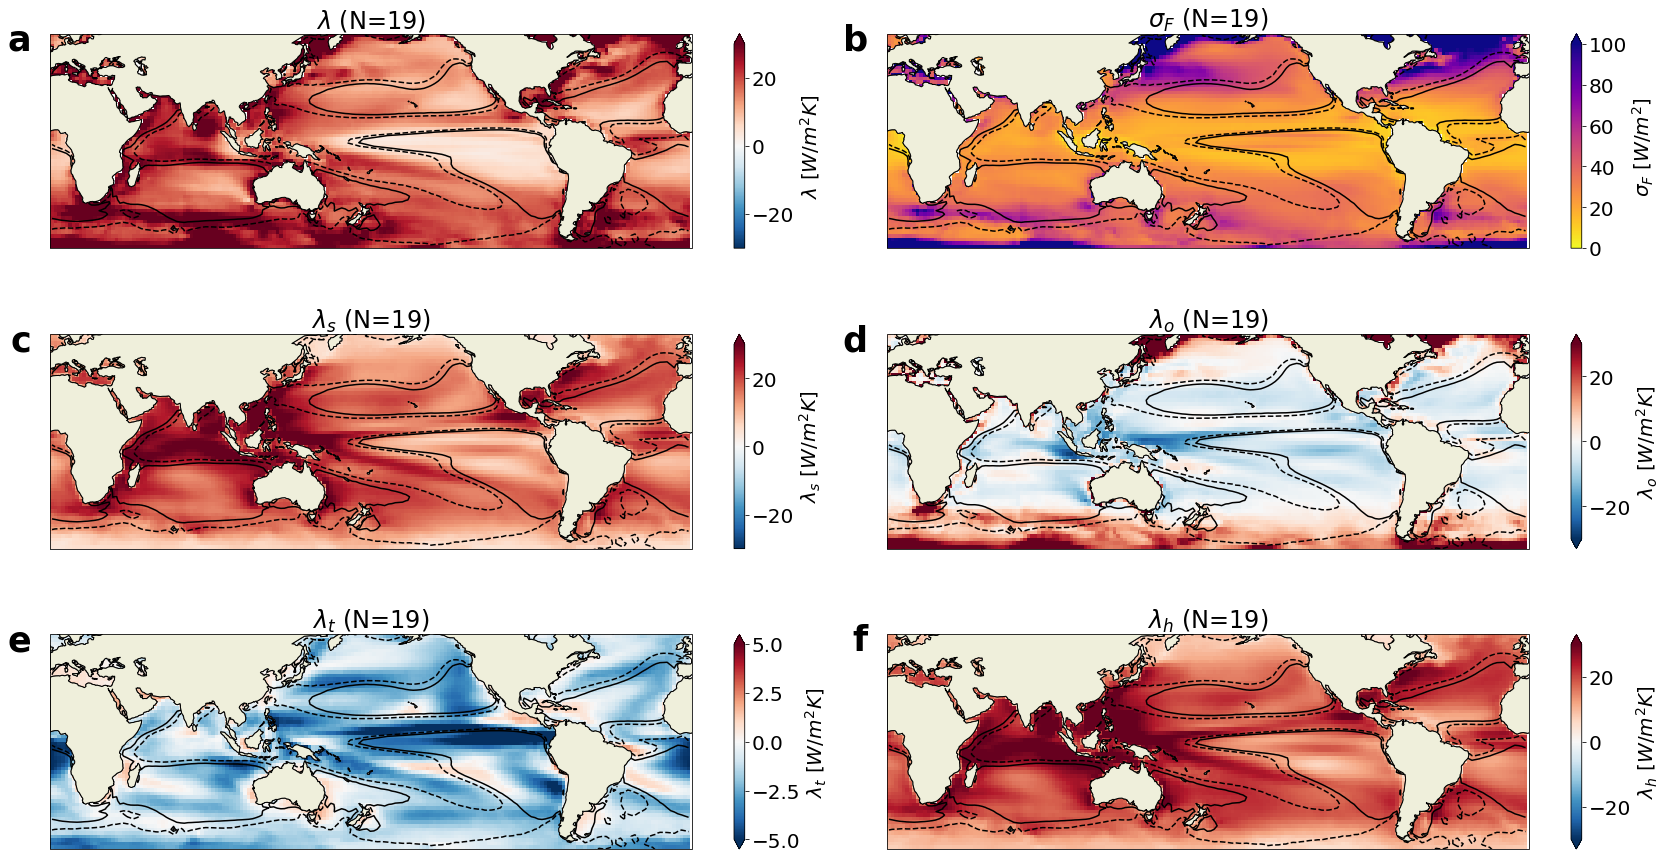

In [12]:
fig = plt.figure(figsize=(30, 15))
gs = gridspec.GridSpec(nrows=3, ncols=2)
gs.update(wspace=0)
#top=300
#bottom=270
font = {'size'   : 20,
        'weight' : 'normal'}

matplotlib.rc('font', **font)

vmin = -30
vmax = 30

ax1 = fig.add_subplot(gs[0,0], projection=ccrs.PlateCarree(central_longitude=180))
lambda_tot.mean('name').plot(ax=ax1, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax,
                           cmap='RdBu_r', cbar_kwargs = {#"shrink": 0.7,
                                                         "label": r'$\lambda$ [$W/m^2K$]'}
                                          )
ax1.coastlines(color='black', linewidth=1)
vert_ds.mean('name').plot.contour(ax=ax1, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
#cb1.set_label(label=r'$\lambda$ [$W/m^2K$]')
ax1.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax1.text(-0.03, 1.05, 'a', transform=ax1.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
ax1.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
plt.title(r'$\lambda$ (N=19)')

ax2 = fig.add_subplot(gs[0,1], projection=ccrs.PlateCarree(central_longitude=180))
F_std.mean('name').plot(ax=ax2, transform=ccrs.PlateCarree(), vmin=0, vmax=100, cmap='plasma_r',
                                 cbar_kwargs = {#'shrink': 0.7,
                                                #'ticks': [10e1],
                                                "label": r'$\sigma_F$ [$W/m^2$]'}
                                )
#cb = plt.colorbar(f_plot, orientation="horizontal", pad=0.05, aspect=25, shrink=0.9, extend='both', 
#                  ticks=[10**1, 2*10**1, 4*10**1, 6*10**1, 8*10**1,10**2])
#cb.ax.minorticks_off()
#cb.ax.set_xticklabels([1e1, 2e1, 4e1, 6e1, 8e1,10e1])
#cb.set_ticklabels([r'$10^1$', r'$2x10^1$', r'$4x10^1$', r'$6x10^1$', r'$8x10^1$', r'$10^2$'])
ax2.coastlines(color='black', linewidth=1)
#cb.set_label(label=r'$\sigma_F$ [$W/m^2$]')
vert_ds.mean('name').plot.contour(ax=ax2, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
ax2.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax2.text(-0.03, 1.05, 'b', transform=ax2.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
ax2.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
plt.title(r'$\sigma_F$ (N=19)')

ax3 = fig.add_subplot(gs[1,0], projection=ccrs.PlateCarree(central_longitude=180))
lambda_s.mean('name').plot(ax=ax3, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax, 
                           cmap='RdBu_r', cbar_kwargs = {#"shrink": 0.7,
                                                         "label": r'$\lambda_s$ [$W/m^2K$]'})
ax3.coastlines(color='black', linewidth=1)
#ax1.gridlines(draw_labels=True)
vert_ds.mean('name').plot.contour(ax=ax3, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
ax3.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax3.text(-0.03, 1.05, 'c', transform=ax3.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
plt.title(r'$\lambda_s$ (N=19)')
ax3.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')

ax4 = fig.add_subplot(gs[1,1], projection=ccrs.PlateCarree(central_longitude=180))
lambda_o.mean('name').plot(ax=ax4, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax,
                               cmap='RdBu_r', cbar_kwargs = {#"shrink": 0.7,
                                                             "label": r'$\lambda_o$ [$W/m^2K$]'})
ax4.coastlines(color='black', linewidth=1)
vert_ds.mean('name').plot.contour(ax=ax4, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
ax4.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax4.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')
ax4.text(-0.03, 1.05, 'd', transform=ax4.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
plt.title(r'$\lambda_o$ (N=19)')

ax5 = fig.add_subplot(gs[2,0], projection=ccrs.PlateCarree(central_longitude=180))
lambda_t.mean('name').plot(ax=ax5, transform=ccrs.PlateCarree(), vmin=-5, vmax=5,
                           cmap='RdBu_r', cbar_kwargs = {#"shrink": 0.7,
                                                         "label": r'$\lambda_t$ [$W/m^2K$]'})
ax5.coastlines(color='black', linewidth=1)
ax5.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
ax5.text(-0.03, 1.05, 'e', transform=ax5.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
vert_ds.mean('name').plot.contour(ax=ax5, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
plt.title(r'$\lambda_t$ (N=19)')
ax5.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')

ax6 = fig.add_subplot(gs[2,1], projection=ccrs.PlateCarree(central_longitude=180))
lambda_h.mean('name').plot(ax=ax6, transform=ccrs.PlateCarree(), vmin=vmin, vmax=vmax,
                           cmap='RdBu_r', cbar_kwargs = {#"shrink": 0.7,
                                                         "label": r'$\lambda_h$ [$W/m^2K$]'})
ax6.coastlines(color='black', linewidth=1)
ax6.text(-0.03, 1.05, 'f', transform=ax6.transAxes,
      fontsize=35, fontweight='bold', va='top', ha='right')
ax6.set_extent([0,359,-60,60], crs=ccrs.PlateCarree())
vert_ds.mean('name').plot.contour(ax=ax6, transform=ccrs.PlateCarree(), colors='black', levels=[-0.005,0.005])
plt.title(r'$\lambda_h$ (N=19)')
ax6.add_feature(cartopy.feature.LAND, zorder=2, edgecolor='k')

plt.subplots_adjust(wspace=0.3, hspace=0.4)